In [3]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import math

#Loading the titanic dataset from the seaborn library into a pandas dataframe
df = sns.load_dataset('titanic')

In [5]:
#Printing first 5 rows of the dataframe by slicing
print("First 5 rows:")
first_five_rows = df[:5]
print(first_five_rows)

#Note that we could have directly used df.head()

First 5 rows:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [88]:
#Printing the column headers using pandas column attribute
print("Column headers:")
print(df.columns)

Column headers:
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [106]:
#Changing the column headers to uppercase using standard python string operations
df.columns = df.columns.str.upper()
print("New column headers:")
print(df.columns)

New column headers:
Index(['SURVIVED', 'PCLASS', 'SEX', 'AGE', 'SIBSP', 'PARCH', 'FARE',
       'EMBARKED', 'CLASS', 'WHO', 'ADULT_MALE', 'DECK', 'EMBARK_TOWN',
       'ALIVE', 'ALONE'],
      dtype='object')


In [110]:
#Calculating descriptive statistics of the dataset
print("Descriptive statistics of the dataset:\n")

#Columns which have numerical (rather than categorical) data for which we want to calculate
relevant_columns = ['SURVIVED', 'PCLASS', 'AGE', 'SIBSP', 'PARCH', 'FARE']

#The following functions take a list (sorted when relevant) as a parameter and return the respective descriptive statistic

def mean (numbers):
    sum = 0
    for x in numbers:
        sum += x
    return (sum / len(numbers))

def stddev (numbers):
    avg = mean(numbers)
    variance = 0
    for x in numbers:
        variance += ((x - avg) ** 2)
    variance /= len(numbers)
    std_dev = math.sqrt(variance)
    return std_dev

def minimum (numbers):
    minm = numbers[0]
    for x in range(1, len(numbers)):
        if x < minm:
            minm = x
    return minm

def maximum (numbers):
    maxm = numbers[0]
    for x in range(1, len(numbers)):
        if x > maxm:
            maxm = x
    return maxm

def unique (numbers):
    return len(set(numbers))

def median (numbers):
    n = len(numbers)
    if n % 2 == 1:
        return numbers[n//2]
    else:
        return (numbers[n//2 - 1] + numbers[n//2]) / 2

def quartile1 (numbers):
    n = len(numbers)
    mid = n//2
    numbers1 = numbers[:mid]
    return median(numbers1)

def quartile2 (numbers):
    n = len(numbers)
    mid = n//2
    numbers2 = numbers[mid:]
    return median(numbers2)

#Iterating each column, creating a list of the data and then using the above functions to calculate the desired data

for col in df.columns:
    if col in relevant_columns:
        val = df[col].dropna().tolist()
        val.sort()
        print(col + ":")
        print(f"Mean: {mean(val)}, Standard Deviation: {stddev(val)}")
        print(f"25th Quartile: {quartile1(val)}, 50th Quartile: {median(val)}, 75th Quartile: {quartile2(val)}")
        print(f"Minimum Value: {minimum(val)}, Maximum Value: {maximum(val)}")
        print(f"Number of Unique Values: {unique(val)}\n")

Descriptive statistics of the dataset:

SURVIVED:
Mean: 0.3838383838383838, Standard Deviation: 0.48631931786709665
25th Quartile: 0, 50th Quartile: 0, 75th Quartile: 1.0
Minimum Value: 0, Maximum Value: 890
Number of Unique Values: 2

PCLASS:
Mean: 2.308641975308642, Standard Deviation: 0.8356019334795171
25th Quartile: 2, 50th Quartile: 3, 75th Quartile: 3.0
Minimum Value: 1, Maximum Value: 890
Number of Unique Values: 3

AGE:
Mean: 29.69911764705882, Standard Deviation: 14.51632115081731
25th Quartile: 20.0, 50th Quartile: 28.0, 75th Quartile: 38.0
Minimum Value: 0.42, Maximum Value: 713
Number of Unique Values: 88

SIBSP:
Mean: 0.5230078563411896, Standard Deviation: 1.1021244350892883
25th Quartile: 0, 50th Quartile: 0, 75th Quartile: 1.0
Minimum Value: 0, Maximum Value: 890
Number of Unique Values: 7

PARCH:
Mean: 0.38159371492704824, Standard Deviation: 0.8056047612452211
25th Quartile: 0, 50th Quartile: 0, 75th Quartile: 0.0
Minimum Value: 0, Maximum Value: 890
Number of Unique

In [112]:
#Checking missing values in the dataset by iterating through each value
print("Total number of missing values for each column:\n")

#Dictionary to store the count of missing values for each column
missing_counts = {}

#Looping through every datavalue in the dataset
for col in df.columns:
    missing_count = 0
    for row in range(len(df)):
        if df.iloc[row][col] != df.iloc[row][col]:
            missing_count += 1
    missing_counts[col] = missing_count

#Print the number of missing values column-wise
for column, count in missing_counts.items():
    print(f"{column}: {count}")

Total number of missing values for each column:

SURVIVED: 0
PCLASS: 0
SEX: 0
AGE: 177
SIBSP: 0
PARCH: 0
FARE: 0
EMBARKED: 2
CLASS: 0
WHO: 0
ADULT_MALE: 0
DECK: 688
EMBARK_TOWN: 2
ALIVE: 0
ALONE: 0


In [116]:
#Filling the missing values in the age column with median age and finding the new average age

#Finding median age using function used in Q5
val = df["AGE"].dropna().tolist()
val.sort()
median_age = median(val)

#Updating all NaN values
for i in range(len(df)):
    if df["AGE"][i] != df["AGE"][i]:
        df.at[i, "AGE"] = median_age

print("Average age of passengers after filling the missing values: ")

val = df["AGE"].tolist()
print(mean(val))

Average age of passengers after filling the missing values: 
29.36158249158249


In [118]:
#Finding and printing the statistics about survival
survived = (df['SURVIVED'] == 1).sum()
not_survived = (df['SURVIVED'] == 0).sum()
survival_rate = (survived / (survived + not_survived)) * 100

print(f"Number of passengers who survived: {survived}")
print(f"Number of passengers who did not survive: {not_survived}")
print(f"Survival rate: {survival_rate}%")

Number of passengers who survived: 342
Number of passengers who did not survive: 549
Survival rate: 38.38383838383838%


C:\Users\Tanay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='AGE', ylabel='Count'>

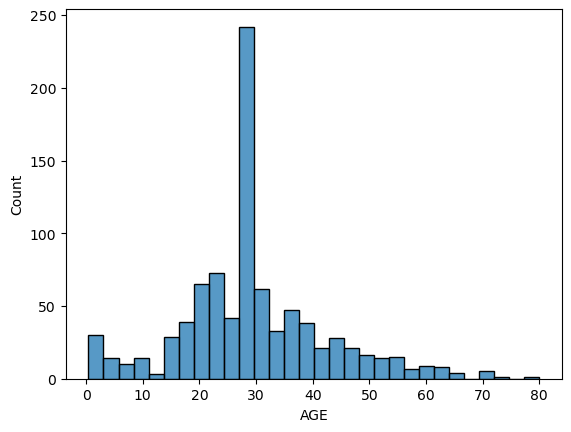

In [164]:
#A histogram of the ages of the passengers
sns.histplot(df["AGE"])

C:\Users\Tanay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


[Text(0.5, 0, 'Passenger Class'),
 Text(0, 0.5, 'Number of Passengers'),
 Text(0.5, 1.0, 'Number of Passengers in Each Class')]

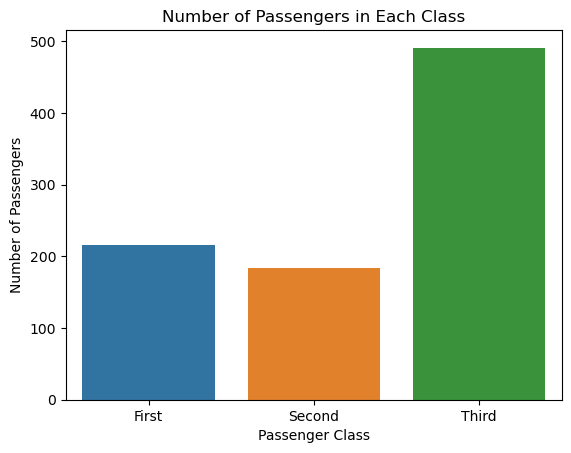

In [162]:
#A bar plot showing the number of passengers in each class.

#Creating a frequency array to store count since we are creating a barplot
val = df["CLASS"].tolist()
freq = {}
for x in val:
    if x in freq:
        freq[x] += 1
    else:
        freq[x] = 1
keys = ["First", "Second", "Third"]
# keys = list(freq.keys())

sns.barplot(x = keys, y = [freq[j] for j in keys]).set (
    xlabel = 'Passenger Class', 
    ylabel = 'Number of Passengers', 
    title = 'Number of Passengers in Each Class'
)

[Text(0.5, 0, 'Survived (0 = No, 1 = Yes)'),
 Text(0, 0.5, 'Number of Passengers'),
 Text(0.5, 1.0, 'Number of Survivors vs Non-Survivors')]

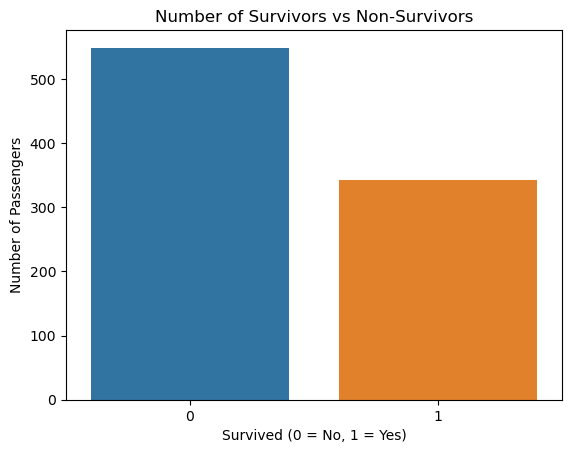

In [138]:
#A count plot showing the number of survivors and non-survivors
sns.countplot(x = 'SURVIVED', data = df).set(
    xlabel = 'Survived (0 = No, 1 = Yes)', 
    ylabel = 'Number of Passengers', 
    title = 'Number of Survivors vs Non-Survivors'
)